In [ ]:
import pandas as pd


# Leer el archivo CSV
df = pd.read_csv('/content/games.csv')

# Mostrar las primeras filas del dataset para verificar que se haya cargado correctamente
df.head()


,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


# Ejercicio 2

##Cálculo de Percentiles y cuartiles
Funciones para calcular el percentil y cuartil por columnas

In [ ]:
def calcular_percentil(datos, percentil):
    datos_ordenados = sorted(datos)
    k = (len(datos_ordenados) - 1) * percentil / 100
    f = int(k)
    c = k - f
    if f == len(datos_ordenados) - 1:
        return datos_ordenados[f]
    return datos_ordenados[f] + (datos_ordenados[f + 1] - datos_ordenados[f]) * c

def calcular_cuartiles(datos):
    Q1 = calcular_percentil(datos, 25)
    Q2 = calcular_percentil(datos, 50)  # Mediana
    Q3 = calcular_percentil(datos, 75)
    return Q1, Q2, Q3


In [ ]:
# Función para calcular cuartiles y percentiles sin librerías adicionales
def calcular_cuartiles_y_percentiles(datos):
    Q1 = calcular_percentil(datos, 25)
    Q2 = calcular_percentil(datos, 50)  # Mediana
    Q3 = calcular_percentil(datos, 75)
    P10 = calcular_percentil(datos, 10)
    P90 = calcular_percentil(datos, 90)
    return Q1, Q2, Q3, P10, P90

In [ ]:
# Filtrar las columnas numéricas del dataframe
columnas_numericas = df.select_dtypes(include=['float64', 'int64']).columns

# Diccionario para almacenar los cuartiles y percentiles de cada columna
resultados_columnas = {}

# Calcular percentiles y cuartiles para cada columna numérica
for columna in columnas_numericas:
    datos_columna = df[columna].dropna().tolist()  # Convertir columna a lista sin valores NaN
    if len(datos_columna) > 0:
        Q1, Q2, Q3, P10, P90 = calcular_cuartiles_y_percentiles(datos_columna)
        resultados_columnas[columna] = {
            'Cuartil 1 (Q1)': Q1,
            'Mediana (Q2)': Q2,
            'Cuartil 3 (Q3)': Q3,
            'Percentil 10 (P10)': P10,
            'Percentil 90 (P90)': P90
        }

# Mostrar los resultados de cada columna
for columna, resultados in resultados_columnas.items():
    print(f"Columna: {columna}")
    for key, value in resultados.items():
        print(f"{key}: {value}")
    print("\n")

Columna: AppID
Cuartil 1 (Q1): 700535.0
Mediana (Q2): 1176745.0
Cuartil 3 (Q3): 1692255.0
Percentil 10 (P10): 398870.0
Percentil 90 (P90): 2050625.0


Columna: Peak CCU
Cuartil 1 (Q1): 0.0
Mediana (Q2): 0.0
Cuartil 3 (Q3): 1.0
Percentil 10 (P10): 0.0
Percentil 90 (P90): 7.0


Columna: Required age
Cuartil 1 (Q1): 0.0
Mediana (Q2): 0.0
Cuartil 3 (Q3): 0.0
Percentil 10 (P10): 0.0
Percentil 90 (P90): 0.0


Columna: Price
Cuartil 1 (Q1): 0.99
Mediana (Q2): 4.99
Cuartil 3 (Q3): 9.99
Percentil 10 (P10): 0.0
Percentil 90 (P90): 16.99


Columna: DLC count
Cuartil 1 (Q1): 0.0
Mediana (Q2): 0.0
Cuartil 3 (Q3): 0.0
Percentil 10 (P10): 0.0
Percentil 90 (P90): 1.0


Columna: Metacritic score
Cuartil 1 (Q1): 0.0
Mediana (Q2): 0.0
Cuartil 3 (Q3): 0.0
Percentil 10 (P10): 0.0
Percentil 90 (P90): 0.0


Columna: User score
Cuartil 1 (Q1): 0.0
Mediana (Q2): 0.0
Cuartil 3 (Q3): 0.0
Percentil 10 (P10): 0.0
Percentil 90 (P90): 0.0


Columna: Positive
Cuartil 1 (Q1): 1.0
Mediana (Q2): 9.0
Cuartil 3 (Q3): 59.0

# Análisis de Distribuciones

## AppID
- **Distribución Sugerida:** N/A (identificador único).
- **Gráfica:** No aplicable.

## Name
- **Distribución Sugerida:** N/A (valores únicos).
- **Gráfica:** No aplicable.

## Release date
- **Distribución Sugerida:** Distribución de probabilidad de tiempo (histograma).
- **Gráfica:** Histograma de fechas de lanzamiento.

## Estimated owners
- **Distribución Sugerida:** Distribución normal o Poisson.
- **Gráfica:** Histograma de propietarios estimados.

## Peak CCU
- **Distribución Sugerida:** Distribución normal o Poisson.
- **Gráfica:** Histograma de usuarios simultáneos pico.

## Required age
- **Distribución Sugerida:** Distribución binomial (edades).
- **Gráfica:** Histograma de edades requeridas.

## Price
- **Distribución Sugerida:** Distribución log-normal.
- **Gráfica:** Histograma de precios.

## DLC count
- **Distribución Sugerida:** Distribución Poisson.
- **Gráfica:** Histograma de conteo de DLC.

## Windows
- **Distribución Sugerida:** Distribución binomial.
- **Gráfica:** Gráfica de barras de valores booleanos.

## Mac
- **Distribución Sugerida:** Distribución binomial.
- **Gráfica:** Gráfica de barras de valores booleanos.

## Linux
- **Distribución Sugerida:** Distribución binomial.
- **Gráfica:** Gráfica de barras de valores booleanos.


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


AppID - Estadístico de Shapiro-Wilk: 0.9707256564489916, p-value: 4.0714883239929754e-75


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Peak CCU - Estadístico de Shapiro-Wilk: 0.006743878463894792, p-value: 1.9926221456336305e-174


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Required age - Estadístico de Shapiro-Wilk: 0.12470772264675734, p-value: 3.861811525819433e-170


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Price - Estadístico de Shapiro-Wilk: 0.527919260685267, p-value: 5.605417005896098e-150


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


DLC count - Estadístico de Shapiro-Wilk: 0.012687636299112959, p-value: 3.192864407690798e-174


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Metacritic score - Estadístico de Shapiro-Wilk: 0.23688449383394827, p-value: 1.501761678478061e-165


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


User score - Estadístico de Shapiro-Wilk: 0.007091587850484804, p-value: 2.0482015505758687e-174


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Positive - Estadístico de Shapiro-Wilk: 0.0148638233612578, p-value: 3.7968674281387424e-174


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Negative - Estadístico de Shapiro-Wilk: 0.01102993926362661, p-value: 2.79874480385344e-174
Score rank - Estadístico de Shapiro-Wilk: 0.8592158996193211, p-value: 0.00010682158930279277


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Achievements - Estadístico de Shapiro-Wilk: 0.05782121484683056, p-value: 1.2481180372755315e-172


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Recommendations - Estadístico de Shapiro-Wilk: 0.018347739016885467, p-value: 5.0141746581333575e-174


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Average playtime forever - Estadístico de Shapiro-Wilk: 0.056078933653669005, p-value: 1.0802762282825836e-172


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Average playtime two weeks - Estadístico de Shapiro-Wilk: 0.030212002515916048, p-value: 1.3013836027471808e-173


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Median playtime forever - Estadístico de Shapiro-Wilk: 0.027368505463389092, p-value: 1.0344719861792011e-173


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 71716.
  res = hypotest_fun_out(*samples, **kwds)


Median playtime two weeks - Estadístico de Shapiro-Wilk: 0.029724247612252452, p-value: 1.251085669033297e-173


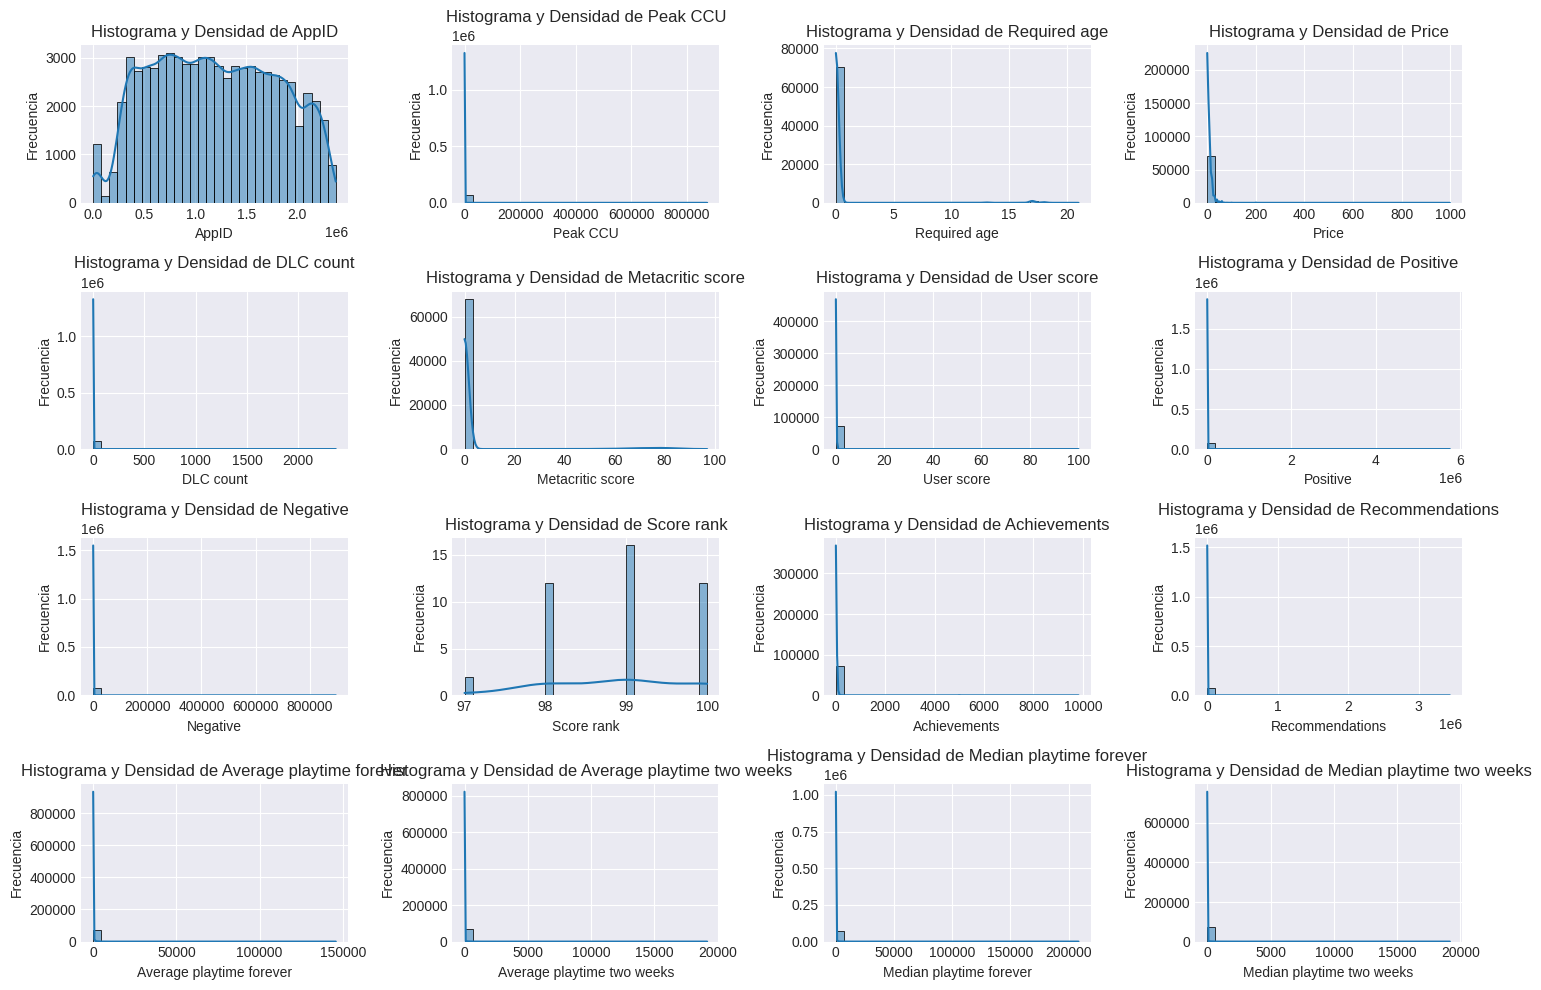

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Leer el archivo CSV
df = pd.read_csv('/content/games.csv')

# Filtrar solo las columnas numéricas
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Configurar el gráfico
plt.figure(figsize=(15, 10))

# Iterar a través de cada columna numérica
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Cambia el número de filas y columnas según la cantidad de columnas
    data = df[col].dropna()  # Asegúrate de que no haya valores NaN
    sns.histplot(data, bins=30, kde=True)
    plt.title(f'Histograma y Densidad de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Realizar el test de normalidad (Shapiro-Wilk)
    shapiro_test = stats.shapiro(data)
    print(f'{col} - Estadístico de Shapiro-Wilk: {shapiro_test.statistic}, p-value: {shapiro_test.pvalue}')

plt.tight_layout()
plt.show()


   Price Estimated owners  User score
0  19.99        0 - 20000           0
1   0.99        0 - 20000           0
2   4.99        0 - 20000           0
3   5.99        0 - 20000           0
4   0.00        0 - 20000           0


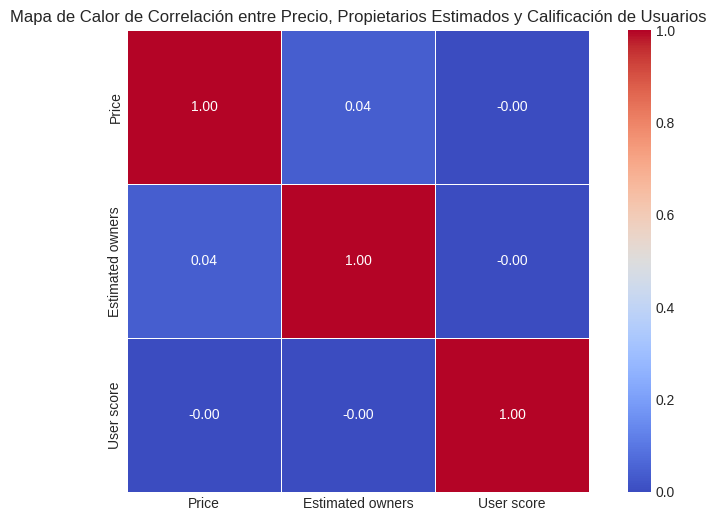

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
url = '/content/games.csv'  # Reemplazar con la URL real del dataset en Google Drive o Kaggle
data = pd.read_csv(url)

data = pd.read_csv(url)

# Inspeccionar las columnas seleccionadas
print(data[['Price', 'Estimated owners', 'User score']].head())

# Limpiar y convertir las columnas relevantes a numéricas
# Convertir 'Price' a float, eliminando el signo de moneda y espacios en blanco
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Convertir 'Estimated owners' a numérico (puede requerir limpieza adicional)
data['Estimated owners'] = data['Estimated owners'].str.extract('(\d+)')[0]
data['Estimated owners'] = pd.to_numeric(data['Estimated owners'], errors='coerce')

# Convertir 'User score' a float
data['User score'] = pd.to_numeric(data['User score'], errors='coerce')

# Seleccionar las columnas relevantes después de la limpieza
selected_columns = data[['Price', 'Estimated owners', 'User score']]

# Calcular la matriz de correlación
correlation_matrix = selected_columns.corr()

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Crear el mapa de calor
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=.5)

# Agregar título
plt.title('Mapa de Calor de Correlación entre Precio, Propietarios Estimados y Calificación de Usuarios')
plt.show()


Price - Mean: 7.223054827374643, Median: 4.99, Mode: 0.0
Estimated owners - Mean: 56962.463048692065, Median: 0.0, Mode: 0.0
User score - Mean: 0.04496904456467176, Median: 0.0, Mode: 0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future ve

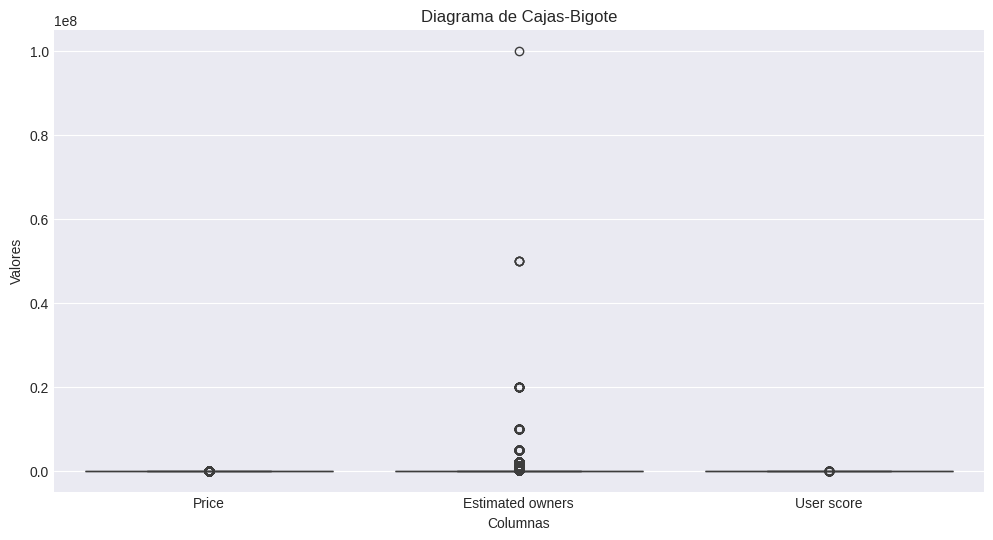

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
url = '/content/games.csv'  # Reemplazar con la URL real del dataset en Google Drive o Kaggle
data = pd.read_csv(url)

# Limpiar y convertir las columnas relevantes a numéricas
# Asegúrate de que las columnas que deseas analizar sean numéricas
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')
data['Estimated owners'] = data['Estimated owners'].str.extract('(\d+)')[0].astype(float)
data['User score'] = pd.to_numeric(data['User score'], errors='coerce')

# Calcular la media, mediana y moda
mean_price = data['Price'].mean()
median_price = data['Price'].median()
mode_price = data['Price'].mode()[0]

mean_owners = data['Estimated owners'].mean()
median_owners = data['Estimated owners'].median()
mode_owners = data['Estimated owners'].mode()[0]

mean_score = data['User score'].mean()
median_score = data['User score'].median()
mode_score = data['User score'].mode()[0]

# Imprimir resultados
print(f"Price - Mean: {mean_price}, Median: {median_price}, Mode: {mode_price}")
print(f"Estimated owners - Mean: {mean_owners}, Median: {median_owners}, Mode: {mode_owners}")
print(f"User score - Mean: {mean_score}, Median: {median_score}, Mode: {mode_score}")

# Graficar un diagrama de cajas (boxplot)
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['Price', 'Estimated owners', 'User score']])
plt.title('Diagrama de Cajas-Bigote')
plt.ylabel('Valores')
plt.xlabel('Columnas')
plt.xticks(ticks=[0, 1, 2], labels=['Price', 'Estimated owners', 'User score'])
plt.show()
